# Marketing Analysis of Video Games Across Different Generations

## General Project Information

This research was conducted to online store "StreamChic".

"StreamChic" sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources. 

The goal of the analysis is to identify patterns that determine the success of a game. This will allow us to bet on potentially popular products and plan advertising campaigns. 
The provided data covers the period from 1980 to 2016.

Action plan:

[    1) Studying data and general information.](#title1)

[    2) Data Preparation.](#title2)

[    3) Market Leaders for the Last 3 Years.](#title3)

[    4) The Impact of Rating on Sales.](#title4)

[    5) User Portrait for Each Region.](#title5)

[    6) Influence of ESRB Rating.](#title6)

[    7) Hypothesis Testing.](#title7)

[    8) Conclusions.](#title8)

## <a id="title1"> Step 1. Studying data and general information</a>

In [1]:
# Connecting all necessary libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Many columns have missing values and incorrect data formats; we will address this in the next section.

## <a id="title2"> Step 2. Data Preparation

***Data Preprocessing Plan:***
1. Standardize all columns.
2. Check for duplicates.
3. Standardize all values to convenient data types.
4. Check and, if necessary, fill in missing values.

In [5]:
print(data.columns)
# printing column name  

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [6]:
data.columns = data.columns.str.lower()
# converting all uppercase letters to lowercase
#print(data.columns)
# result checking

### Handing missing values

"Among user scores, the abbreviation 'tbd' is present, which stands for 'to be determined.'
It seems there was insufficient information to fill in this cell.
Let's replace 'tbd' with 'nan'."

In [7]:
#data['user_score'].unique()

#print(data['user_score'].value_counts())
# проверяем количество tbd в 'user_score'
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
#data['user_score'].unique()

# убираем tbd

### Changing data types

In [8]:
data['critic_score'] = data['critic_score'].astype(float)
data['user_score'] = data['user_score'].astype(float)

The 'user_score' and 'critic_score' columns contain numerical values but have the 'object' data type; let's change it to 'float.

In [9]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Missing values and extraneous data are hindering the data type conversion. Therefore, let's start by filling in the gaps and removing artifacts.

There are missing values in 6 columns: In the 'name' and 'genre' columns, there are only 2 missing values each; we will remove those rows. 
In the 'year_of_release' column, there are more missing values, but they would be disruptive to our analysis; we will also remove them.

We will leave the missing values in 'rating,' 'critic_score,' and 'user_score' columns as they are for now. 
In these columns, the missing values likely occurred because the game might not have been rated, or there could have been an error during data extraction.

In [10]:
print(data.duplicated().sum())# Checking for duplicate entries; no duplicates found.

0


In [11]:
# Adding a column with sales data for all regions.
data['all_sales'] = data[['other_sales','eu_sales','jp_sales','na_sales']].sum(axis=1)

***Result of data preprocessing:***
1. Unnecessary rows have been removed.
2. Values in the 'user_score' column have been replaced with 'tbd'.
3. An additional column 'total_sum' has been created.
4. Data types of the 'user_score' and 'critic_score' columns have been changed."

## <a id="title3"> Step 3.  Exploratory Data Analysis (EDA)

***EDA Plan:***
1. Plot a graph of the number of releases per year.
2. Identify market leaders.
3. Examine the timelines of different platforms.
4. Determine a period on which to base a forecast for the year 2017.
5. Identify leaders for the specified period.

In [12]:
data['platform'].value_counts().head(5)
# List of the most popular platforms for the entire period.

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64

Text(0, 0.5, 'Number of releases')

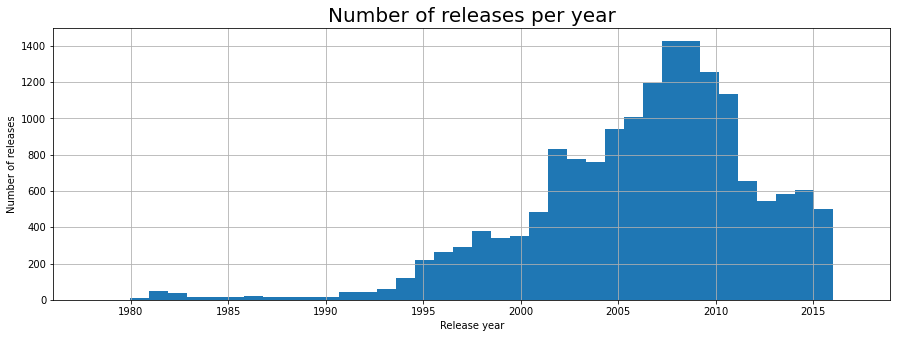

In [13]:
data['year_of_release'].hist(bins=(40), range=(1978,2017), figsize=(15,5))\
                .set_title('Number of releases per year', size =(20))
plt.xlabel('Release year')
plt.ylabel('Number of releases')
# Let's plot a graph to visualize how the number of game releases has changed over the years

The distribution appears to be normal.
It is evident that the video game industry started to develop significantly after the year 1995. 
The peak of game releases is observed around the year 2008.

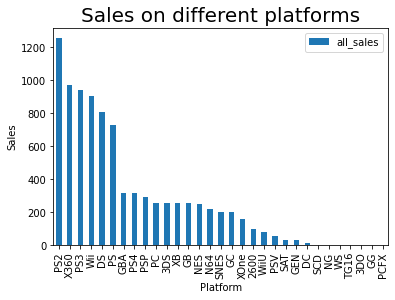

<Figure size 1440x360 with 0 Axes>

In [14]:
# Sales performance across different platforms

platforms = data.pivot_table(index='platform', values='all_sales', aggfunc='sum')\
    .sort_values(by='all_sales', ascending=False)
platforms.plot(kind='bar')
plt.xlabel('Рlatform')
plt.ylabel('Sales')
plt.title('Sales on different platforms',size=20)
plt.figure(figsize=(20, 5));


Market leaders for the entire period: 'PS2','X360','PS3','Wii','DS', PS

### The most popular platforms over the entire period of video game existence.

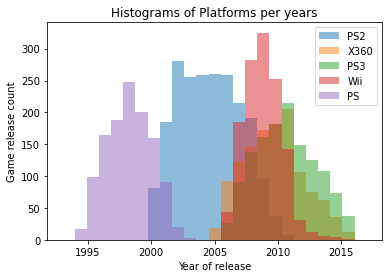

In [15]:
games_names = ['PS2','X360','PS3','Wii','PS']
for e in games_names:
    platform = data[data['platform'] == e]
    plt.hist(platform['year_of_release'],range=(1993,2017), bins=25, alpha=0.5, label= e)
    
plt.xlabel('Year of release')
plt.ylabel('Game release count')
plt.title('Histograms of Platforms per years')
label = ['PS2','X360','PS3','Wii','PS']
plt.legend(label)
plt.figsize = (20,10)

We can observe on the graph how short and bright the lifespan of video game star platforms is.

In [16]:
platform_filter = data.query(('year_of_release>2000.0 and (platform =="PS2" or platform =="X360" \
                    or platform =="PS3" or platform =="Wii"\
                    or platform =="PS" or platform =="DS")'))
# The data before the year 2000 has been excluded to avoid overloading the chart, 
# as the industry was just emerging, and they may not be representative.

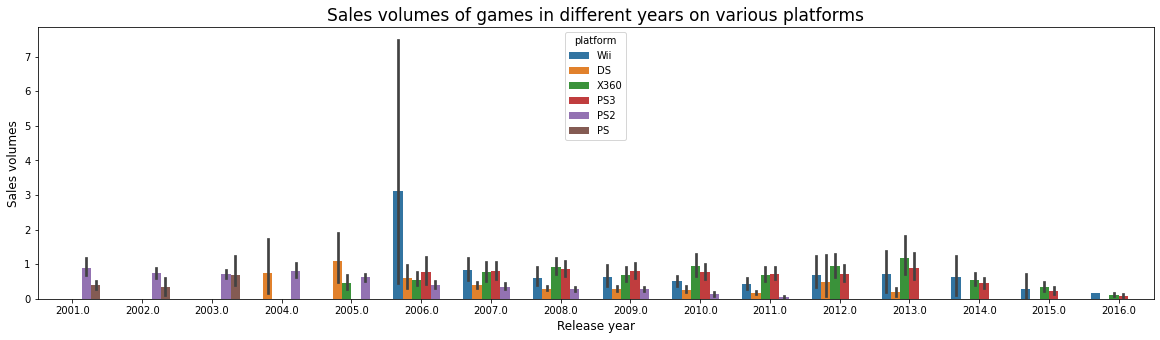

In [17]:
plt.figure(figsize=(20, 5))
sns.barplot(
    x= "year_of_release", 
    y= "all_sales", 
    hue= "platform", 
    data = platform_filter
)
plt.title("Sales volumes of games in different years on various platforms", size=17)
plt.xlabel('Release year', size=12)
plt.ylabel('Sales volumes', size=12);

The video game industry is highly dynamic, with platforms gaining popularity and becoming obsolete
in approximately 10 years. As a result, the platforms that were leaders throughout the entire period are nearly obsolete by 2016.

In [18]:
years_duration= data.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max'])
years_duration.reset_index(inplace=True)

years_duration['fin'] = years_duration[('max', 'year_of_release')]-\
     years_duration[(     'min', 'year_of_release')] + 1
display(years_duration.head())
print()
print('The median lifespan of a platform',years_duration['fin'].median(), 'лет')


,platform,min,max,fin
,,year_of_release,year_of_release,
0,2600,1980.0,1989.0,10.0
1,3DO,1994.0,1995.0,2.0
2,3DS,2011.0,2016.0,6.0
3,DC,1998.0,2008.0,11.0
4,DS,1985.0,2013.0,29.0



The median lifespan of a platform 7.0 лет


### Leading platforms

It's important to understand which platforms were most popular closer to 2016 and filter out outdated ones. Therefore, we will remove all releases before 2013. 
Around this year, the trend in game releases started to decline, allowing us to focus on the development of platforms popular in 2016.

In [19]:
data_2013= data[data['year_of_release'] > 2013]

Text(0.5, 1.0, 'The number of games released on different platforms')

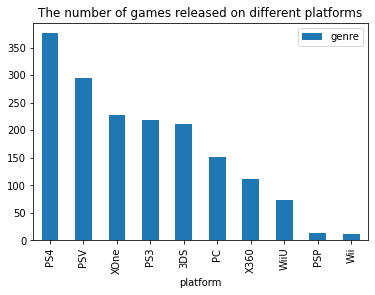

In [20]:
platforms = data_2013.pivot_table(index='platform', values='genre', aggfunc='count')\
    .sort_values(by='genre', ascending=False)
platforms.plot(kind='bar')
plt.title('The number of games released on different platforms')

After 2013, the landscape changed. 
Some platforms lost their market share, for example, PS2. Others remained at the forefront, such as PS3 and X360. Additionally, new stars emerged, like 3DS.

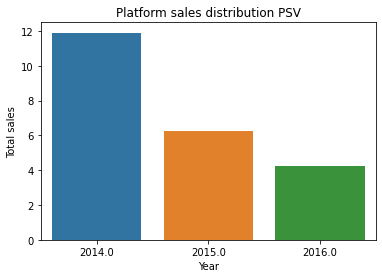

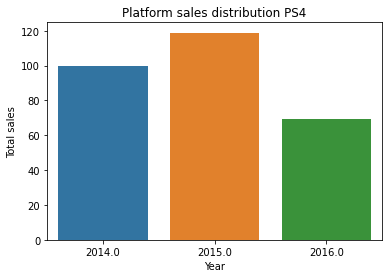

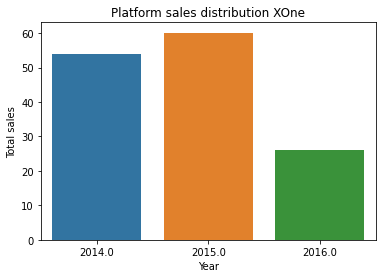

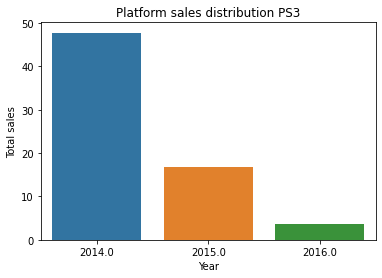

In [21]:
for name in ['PSV', 'PS4', 'XOne', 'PS3']:
    
    # Filtering data by platform, grouping by years, and calculating total sales
    df = data_2013[data_2013['platform'] == name].groupby('year_of_release')['all_sales'].sum().reset_index()
    
    sns.barplot(data=df, x='year_of_release', y='all_sales')  # Creating a graph based on the obtained table
    
    plt.xlabel('Year')
    plt.ylabel('Total sales')
    plt.title(f'Platform sales distribution {name}')
    
    plt.show()

We can observe that the data for 2016 was not provided in its entirety.
The PS4 platform shows a clear growth trend in 2015 and achieves the best results compared to its competitors in 2016.

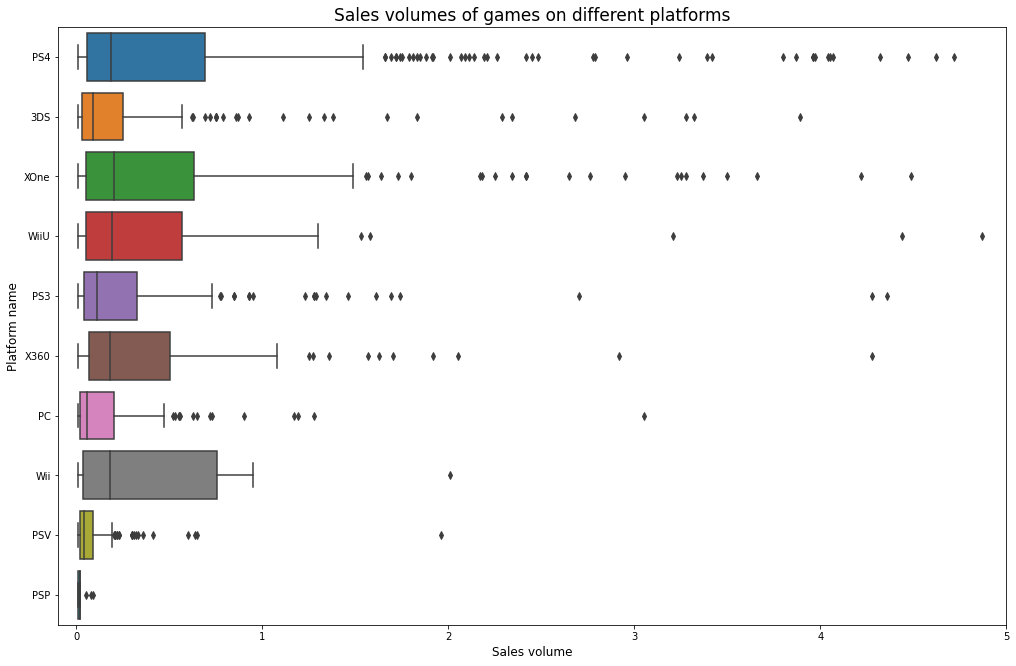

In [22]:
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_2013, y='platform', x='all_sales')
plt.xlim(-0.1, 5)

plt.title('Sales volumes of games on different platforms', size=17)
plt.xlabel('Sales volume', size=12)
plt.ylabel('Platform name', size=12)

plt.show()

The box plots indicate that the majority of games do not generate significant revenue. However, there are standout games that contribute the majority of the platform's earnings.
Platforms without such standout titles lag behind, and the median sales across platforms do not differ significantly.

***EDA Results:***

- Identified leading platforms throughout the entire period of video game existence: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
- Determined the median lifespan of a platform to be 7.0 years.
- Identified market leaders for the last 3 years as 'PS4' and 'XOne'.

## <a id="title4"> Step 4. The Impact of Rating on Sales

***Research Plan:***

Examine the impact of user scores on the profitability of the four most popular platforms.

### The Impact of User Score on Sales

Let's examine the impact of user scores on the profitability of the four most popular platforms.

PS4 Correlation = -0.04013158947269736
3DS Correlation = 0.21519327185270273
XOne Correlation = -0.07038392806475809
WiiU Correlation = 0.40792645792170773


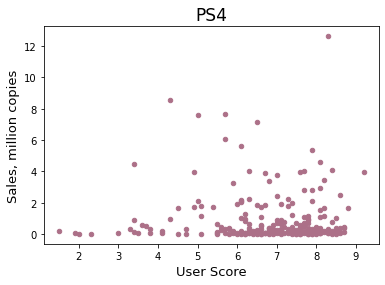

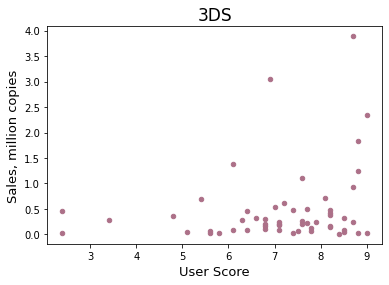

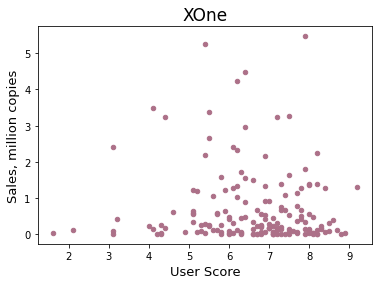

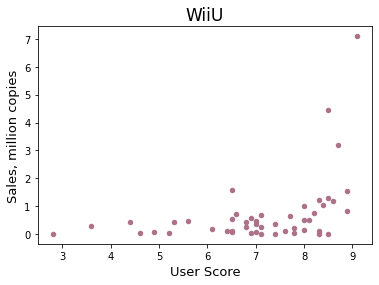

In [23]:
# Visualization of the Relationship Between User Ratings and Company Sales
platform_score = data_2013.query(('platform =="3DS" or platform =="XOne" \
                                     or platform =="WiiU" or platform == "PS4"'))
for platform in platform_score['platform'].unique():
    plot = platform_score[platform_score['platform'] == platform]
    print(platform,'Correlation =', plot['user_score'].corr(plot['all_sales']))
    plot.plot(x='user_score', y='all_sales',kind='scatter', color='#AC7088')
    plt.title(platform, size=17)
    plt.xlabel('User Score', size=13)
    plt.ylabel('Sales, million copies', size=13)

For three out of the four platforms considered, there is almost no correlation between user score and median sales. However, from the graph, it can be observed that if the score is low, sales are likely to be low, and if the score is high, it does not necessarily guarantee high sales.

### The Impact of Critic Score on Sales

PS4 Сorrelation = 0.402661410681041
3DS Сorrelation = 0.314117492869051
XOne Сorrelation = 0.42867694370333226
WiiU Сorrelation = 0.37020141248088395


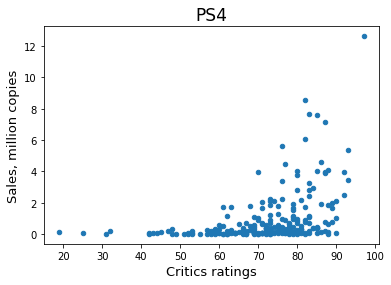

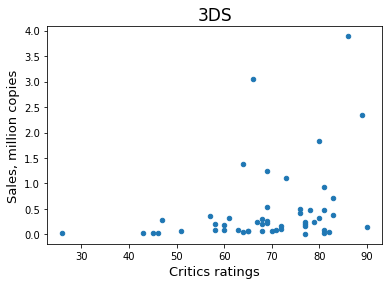

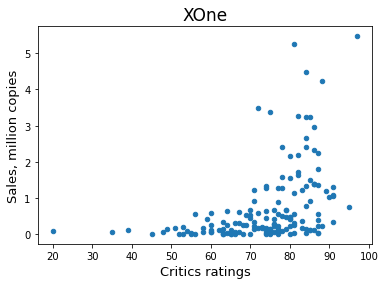

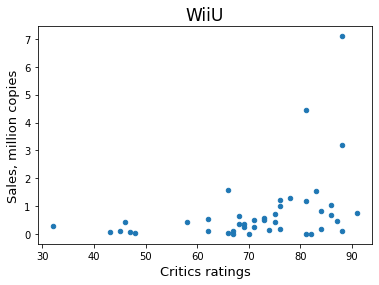

In [24]:
platform_score = data_2013.query(('platform =="3DS" or platform =="XOne" \
                                     or platform =="WiiU" or platform == "PS4"'))
for platform in platform_score['platform'].unique():
    plot = platform_score[platform_score['platform'] == platform]
    print(platform,'Сorrelation =', plot['critic_score'].corr(plot['all_sales']))
    plot.plot(x='critic_score', y='all_sales',kind='scatter')
    plt.title(platform, size=17)
    plt.xlabel('Critics ratings', size=13)
    plt.ylabel('Sales, million copies', size=13)



Visually, based on the graph and correlation, it can be observed that there is a relationship between sales and critic scores, but it is not strong. We draw the same conclusion: if the score is low, sales are likely to be low; however, if the score is high, it does not necessarily guarantee high sales.

***Research Results:***

Direct correlation between sales and user/critic scores was not found.

## <a id="title5"> Step 5. Distribution of games by genres

To visualize the median sales for games in different genres using a box plot.

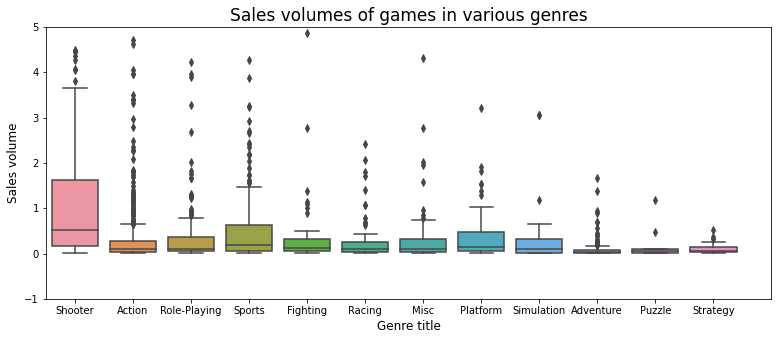

In [25]:
genre_name = data_2013.pivot_table(index='genre', values ='all_sales', aggfunc='median')\
                         .sort_values(by='all_sales', ascending=False)
genre_name.reset_index(inplace=True)
#print(genre_name.head())
data_2013.sort_values
plt.figure(figsize=(13, 5))
sns.boxplot(data=data_2013, y='all_sales', x='genre')
plt.xlim(-0.5, 12.0)
plt.ylim(-1 , 5)
plt.title('Sales volumes of games in various genres', size=17)
plt.xlabel('Genre title', size=12)
plt.ylabel('Sales volume', size=12)

plt.show()

The most profitable genres, including 'Shooter,' 'Action,' 'Role-Playing,' 'Sports,' 'Fighting,' and 'Racing,' collectively contribute to 75% of the total revenue.

In the 'Shooter' and 'Sports' genres, there is a relatively high median, indicating more consistent performance for average games in these genres.

The genres 'Puzzle' and 'Strategy' have the lowest sales.

## <a id="title6"> Step 6. User Portrait for Each Region.

Let's create functions that will build bar charts illustrating the sales volume for each platform in different regions.

In [26]:
def region_sales(region):
    genre_name = data_2013.pivot_table(index='platform', values = region, aggfunc='sum')\
                        .sort_values(by= region, ascending=False).head(5)
    genre_name.plot(kind='bar',figsize=(10, 5), legend = False)
    plt.title(f'Region {region} on different platforms')
    plt.xlabel('Platforms title', size=12)
    plt.ylabel('Sales volume', size=12)

Let's create functions that will generate bar charts illustrating the sales volume for each genre in different regions.

In [27]:
def genrе(region):
    genre_name = data_2013.pivot_table(index='genre', values = region, aggfunc='sum')\
                        .sort_values(by= region, ascending=False).head(5)
    genre_name.plot(kind='bar',figsize=(10, 4), color='#AC7088', legend = False)
    plt.title(f'Region {region}, games of different genres."')
    plt.xlabel('Genrе title', size=12)
    plt.ylabel('Sales volume', size=12)

### User Portrait for  Region NA

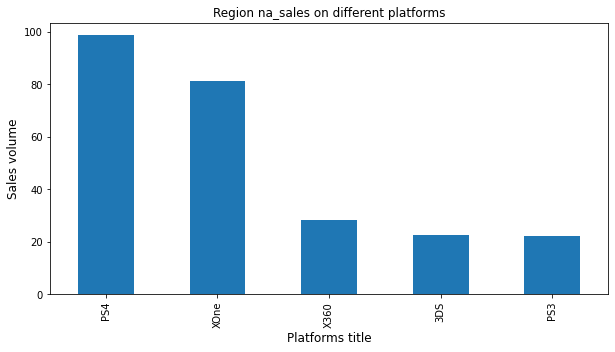

In [28]:
region_sales('na_sales')


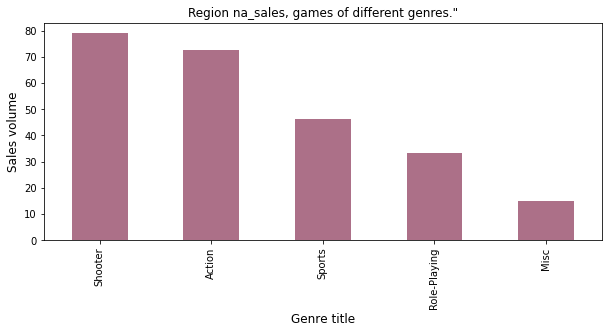

In [29]:
genrе('na_sales') 

**USA**
- Platforms with the largest market share: X360, Xone, WiiU.
- Genres with the largest market share: Shooter, Action, Sport.


### User Portrait for  Region EU

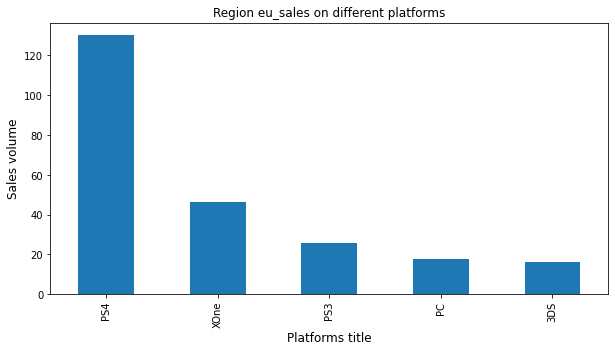

In [30]:
region_sales('eu_sales')

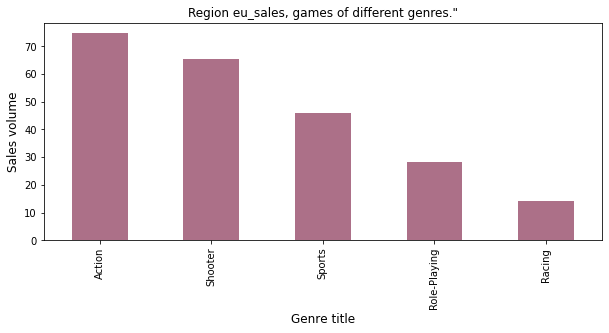

In [31]:
genrе('eu_sales') 

**Europe**
- Platforms with the largest market share: PS4, Xone, PS3 with a significant lead, as well as PS4, Xone.
- Genres with the largest market share: Action, Shooter, Sport

### User Portrait for  Region  JP

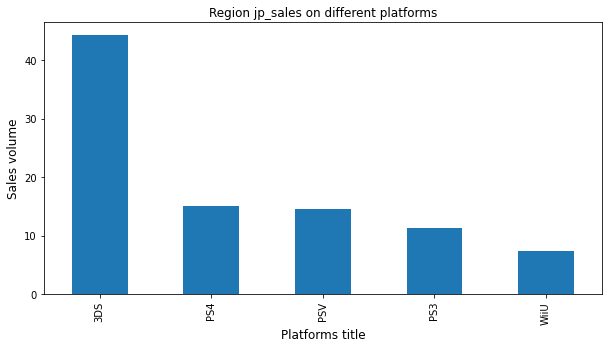

In [32]:
region_sales('jp_sales')

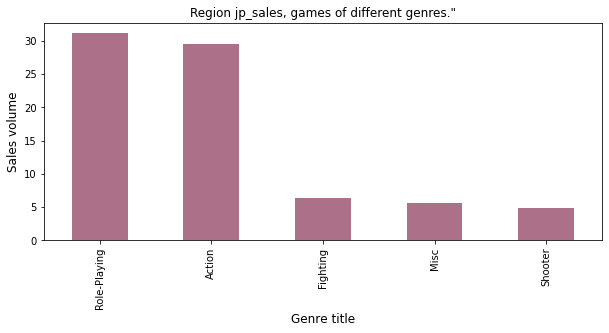

In [33]:
genrе('jp_sales') 

**Japan**
- Platforms with the largest market share: 3DS, PS4, PVS.
- Genres with the largest market share: Role-Playing, Action, Fighting.


**Conclusions:**

The regions of America and Europe are similar in terms of popular genres and platforms.

Japanese region differs significantly from the USA and Europe in both genre preferences and platforms.

Action is one of the most popular genres in all regions.

## <a id="title7"> Step 7. Influence of ESRB Rating

In [34]:
# The Entertainment Software Rating Board (ESRB)
data_2013['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

The Entertainment Software Rating Board (ESRB) is a self-regulatory organization that assigns age and content ratings to video games and apps in North America. The ESRB provides information about the content of games to help consumers make informed choices about the appropriateness of the content for themselves and their children. 

The ratings include categories such as "Everyone (E)," "Teen (T)," "Everyone 10 and older (E10+)" and "Mature (M)," among others, to indicate the target age group and content suitability.

Text(0.5, 1.0, 'Sales by ESRB Rating Across Regions')

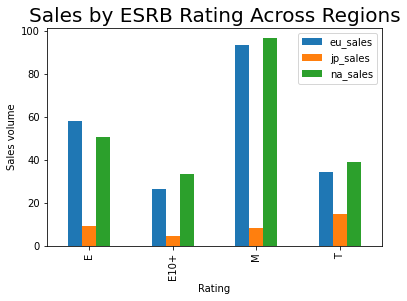

In [35]:
data_2013['rating'].fillna('unknown')
data_2013.pivot_table(index='rating',
                      values=['na_sales','eu_sales','jp_sales'],
                      aggfunc='sum').plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Sales volume')
plt.title('Sales by ESRB Rating Across Regions',size=20)

In Japan, sales of games in different age categories do not vary significantly in terms of volume, although there is a general trend that games targeting audiences aged 10 and older sell less compared to other categories.

In Europe and the USA, games in the 17+ category sell significantly better than games in lower age categories. Games for which age restrictions are not known sell very well, especially in Japan; perhaps it was challenging to gather data on age restrictions in that region.

## <a id="title8"> Step 8. Hypothesis testing

Hypotheses:

\(H_0\): The average user scores for the Xbox One and PC platforms are the same.

\(H_1\): The average user scores for the Xbox One and PC platforms are not the same.

This is a two-sided alternative hypothesis. The samples are independent.

In [36]:
# Remove all missing values from the dataframe to calculate the p-value
platform_XOne_nonan = data_2013[data_2013['platform'] == 'XOne'].dropna()
platform_PC_nonan = data_2013[data_2013['platform'] == 'PC'].dropna()


alpha = 0.05 # significance level
# If the p-value turns out to be less than it - we will reject the hypothesis

results = st.ttest_ind(platform_XOne_nonan['user_score'], platform_PC_nonan['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We failed to reject the null hypothesis') 

p-value: 0.13220921855005272
We failed to reject the null hypothesis


***Conclusion:***

We cannot reject the null hypothesis; with a high degree of confidence, the average user ratings for the XOne and PC platforms do not have statistically significant differences.

In [37]:
genre_action = data_2013[data_2013['genre'] == 'Action'].dropna()
genre_sports = data_2013[data_2013['genre'] == 'Sports'].dropna()


Hypotheses:

\(H_0\): The average user ratings for the Action and Sport genres are the same.

\(H_1\): The average user ratings for the Action and Sport genres are different.

The samples are independent.


In [38]:
alpha = 0.05 # significance level
# If the p-value turns out to be less than it - we will reject the hypothesis


results = st.ttest_ind(genre_action['user_score'], genre_sports['user_score'], equal_var= False)
# I think different genres will have different variability.
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We failed to reject the null hypothesis')

p-value: 3.474253245303909e-08
We reject the null hypothesis


***Conclusion:***

We cannot accept the null hypothesis; with a high degree of probability, the average user ratings for the Action and Sport genres are different. The samples are independent.

## <a id="title9"> Step 9. Conclusions 

**Project Conclusions**

The project's goal was to identify patterns that determine the success of a video game.

**Steps 1-2**

Data preprocessing was conducted, some rows with missing values were removed, and data types were changed in some columns. A column with total sales was added.

**Step 3**

Since 1995, the number of game releases has been increasing, with a peak from 2000 to 2008. After 2008, there was a decrease, possibly related to the 2008 financial crisis. Overall market leaders were 'PS2', 'X360', 'PS3', 'Wii', and 'PS'. The median lifespan of a platform is 7.0 years.

**Step 4**

The relevant period for sales forecast in 2017 was determined as 2014-2016. Releases before 2014 were excluded. Platforms like PS2 lost market share, while newcomers like PS4, PSV, Xone emerged. PS4 has been a consistent leader since 2013.

Most games do not generate significant revenue, but star games contribute significantly to a platform's profits. Platforms without star games lag significantly in terms of revenue.

**Step 5**

**Impact of Reviews on Sales:**
- Correlation with user scores is observed.
- Correlation with critic scores is present but not high.
- Generally, if the scores are low, sales are likely to be low. However, high scores do not guarantee high sales; this applies to both users and critics.

**Genre Distribution:**
- Most profitable genres: 'Shooter,' 'Action,' 'Role-Playing,' 'Sports.'
- Together, they contribute to 75% of total revenue.
- Lowest sales for 'Puzzle' and 'Strategy' genres.

**Step 6**
***Regional Analytics***

**USA:**
- Leading platforms: X360, Xone, WiiU.
- Leading genres: Shooter, Action, Sport.

**Europe:**
- Leading platforms: PS4, Xone, PS3, with a significant lead. Also, PS4, Xone.
- Leading genres: Action, Shooter, Sport.

**Japan:**
- Leading platforms: 3DS, PS4, PVS.
- Leading genres: Role-Playing, Action, Fighting.

**Overall:**
- 'Action' is one of the most popular genres in all regions.

**Step 7**
**ESRB Rating Impact:**
In Japan, sales across different categories do not differ significantly in volume, though a trend shows that games rated for audiences 10+ sell worse than other categories. In Europe and the USA, games rated 17+ sell significantly better than games with lower age categories.

**Step 8**
**Hypothesis Testing**

The significance level for both hypotheses was set at 0.05.

1. **Hypothesis: Average user ratings for Xbox One and PC are the same.**
   - p-value: 0.13
   - Conclusion: We cannot reject the null hypothesis; with a high degree of probability, average user ratings for XOne and PC do not have statistically significant differences.

2. **Hypothesis: Average user ratings for Action and Sport genres are different.**
   - p-value: 3.47e-08
   - Conclusion: We cannot accept the null hypothesis; with a high degree of probability, average user ratings for Action and Sport genres are different.

**Recommendations for Launching a Profitable Game:**
1. Choose the 'Action' or 'Shooter' genre.
2. Launch on 'PS4' in Europe or 'X360' in the USA.
3. Focus on building positive relationships with critics.
4. Target the American and European markets.
5. Analyze the criteria that make a game a star.


**Thank you for your attention!**